In [1]:
import tensorflow as tf
import keras
import numpy as np
import tf_explain
import skimage.io
from tf_explain.core import GradCAM
from matplotlib import pyplot as plt
from tensorflow.keras.applications.vgg16 import decode_predictions
print('Notebook running: tensorflow ', tf.__version__)
print('Notebook running: keras ', keras.__version__)


Using TensorFlow backend.
Notebook running: tensorflow  2.4.1
Notebook running: keras  2.3.1


In [2]:
model = tf.keras.applications.vgg16.VGG16(weights="imagenet", include_top=True)

In [3]:
img = tf.keras.preprocessing.image.load_img("immagine.jpg", target_size=(224, 224))
img = tf.keras.preprocessing.image.img_to_array(img)
data = ([img], None)

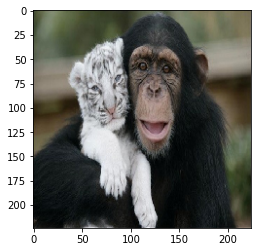

In [4]:
plt.imshow(img/255)

In [5]:
preds = model.predict(img[np.newaxis,:,:,:])
top_pred_index = np.argmax(preds, axis=-1) 
print('Top prediction ImageNet index =',top_pred_index)

Top prediction ImageNet index = [367]


In [6]:
decode_predictions(preds,top=5)

[[('n02481823', 'chimpanzee', 0.48663646),
  ('n02487347', 'macaque', 0.19996162),
  ('n02483708', 'siamang', 0.07331552),
  ('n02493509', 'titi', 0.06600672),
  ('n02483362', 'gibbon', 0.043851025)]]

In [7]:
explainer = GradCAM()
grid1 = explainer.explain(data,model,367)  # 367 is the chimpanzee


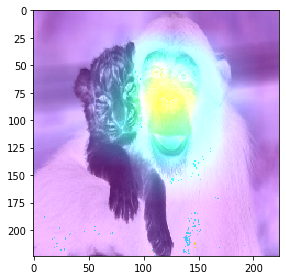

In [8]:
skimage.io.imshow(grid1)